In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

np.random.seed(42)

In [2]:
train = pd.read_csv("C:/Users/My Pc/Desktop/Walmart Sales/train.csv")
test = pd.read_csv("C:/Users/My Pc/Desktop/Walmart Sales/test.csv")
sample =  pd.read_csv("C:/Users/My Pc/Desktop/Walmart Sales/sample_submission.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


# DATA ANALYSIS

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
train["Item_Fat_Content"].where((train["Item_Fat_Content"] == "Low Fat") | (train["Item_Fat_Content"] == "Regular") | 
                                (train["Item_Fat_Content"] == "reg"), "Low Fat", inplace=True)
train["Item_Fat_Content"].where((train["Item_Fat_Content"] == "Regular") | (train["Item_Fat_Content"] == "Low Fat"), "Regular", inplace=True)
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
test["Item_Fat_Content"].where((test["Item_Fat_Content"] == "Low Fat") | (test["Item_Fat_Content"] == "Regular") | 
                                (test["Item_Fat_Content"] == "reg"), "Low Fat", inplace=True)
test["Item_Fat_Content"].where((test["Item_Fat_Content"] == "Regular") | (test["Item_Fat_Content"] == "Low Fat"), "Regular", inplace=True)
test["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [11]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [14]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [15]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


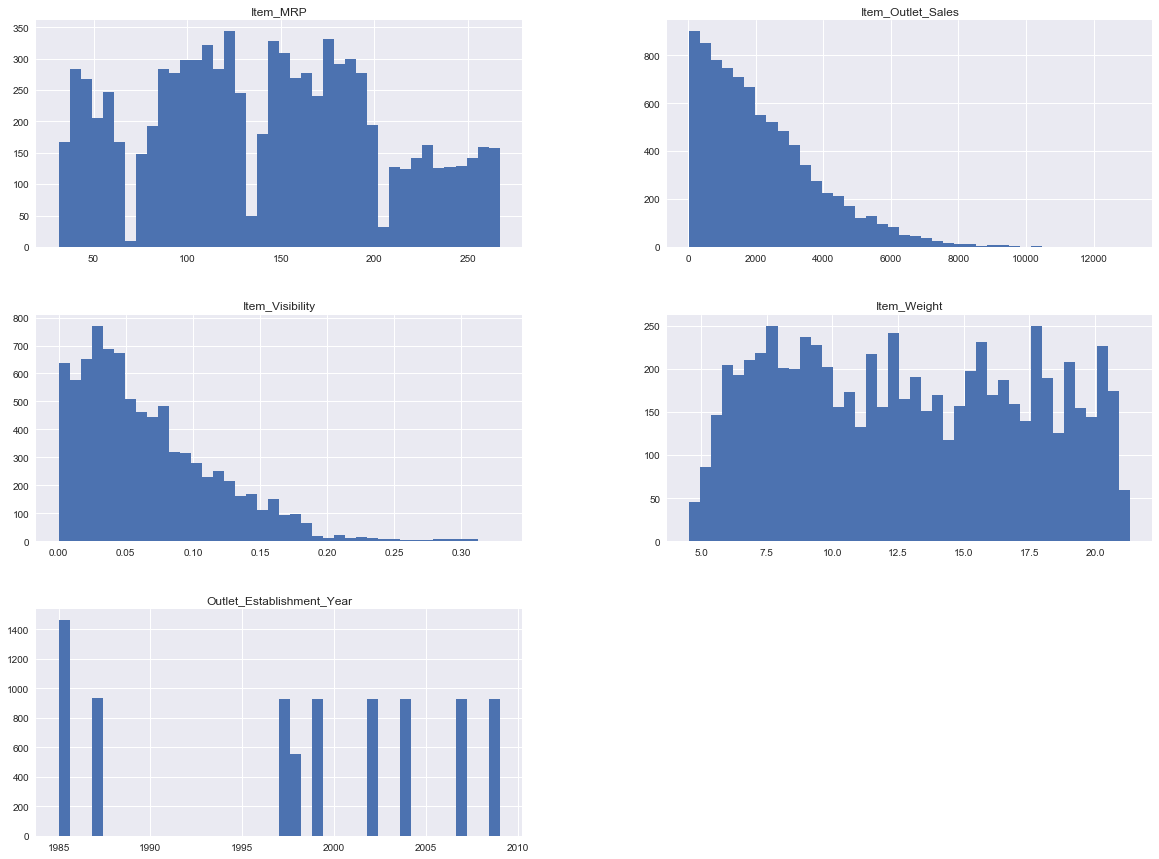

In [16]:
train.hist(bins=40, figsize=(20,15))
plt.show()

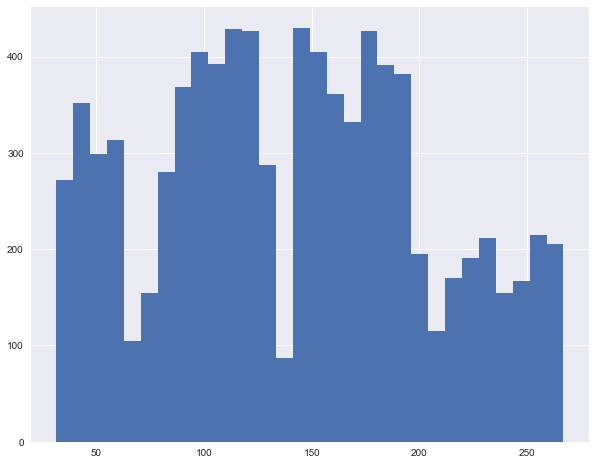

In [17]:
train["Item_MRP"].hist(figsize=(10,8), bins=30)

In [18]:
price_cat = np.ceil(train["Item_MRP"] / 70)
price_cat.value_counts()

3.0    3042
2.0    2778
4.0    1362
1.0    1341
Name: Item_MRP, dtype: int64

In [19]:
train["price_cat"] = np.ceil(train["Item_MRP"] / 70)

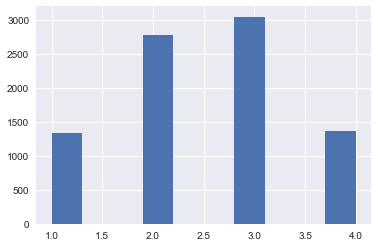

In [20]:
train["price_cat"].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["price_cat"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

In [22]:
strat_test_set["price_cat"].value_counts() / len(strat_test_set)

3.0    0.357185
2.0    0.326100
4.0    0.159531
1.0    0.157185
Name: price_cat, dtype: float64

In [23]:
train["price_cat"].value_counts() / len(train)

3.0    0.356917
2.0    0.325942
4.0    0.159803
1.0    0.157339
Name: price_cat, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

def price_cat_proportions(data):
    return data["price_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": price_cat_proportions(train),
    "Stratified": price_cat_proportions(strat_test_set),
    "Random": price_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [25]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.157339,0.157185,0.161877,2.884135,-0.098014
2.0,0.325942,0.326100,0.354839,8.865742,0.048517
3.0,0.356917,0.357185,0.340762,-4.526020,0.075136
4.0,0.159803,0.159531,0.142522,-10.813880,-0.170269


In [26]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

# VISUALIZE SALES


In [27]:
sales = strat_train_set.copy()

In [28]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
251,FDL20,17.10,Low Fat,0.128938,Fruits and Vegetables,112.3886,OUT018,2009,Medium,Tier 3,Supermarket Type2,1779.0176
5943,FDM58,16.85,Regular,0.079624,Snack Foods,111.6544,OUT013,1987,High,Tier 3,Supermarket Type1,2125.2336
4778,FDT09,15.15,Regular,0.012333,Snack Foods,130.0284,OUT017,2007,NaN,Tier 2,Supermarket Type1,3559.3668
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
4889,FDP01,20.75,Regular,0.063314,Breakfast,153.7682,OUT035,2004,Small,Tier 2,Supermarket Type1,1829.6184


C:\Users\My Pc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\My Pc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


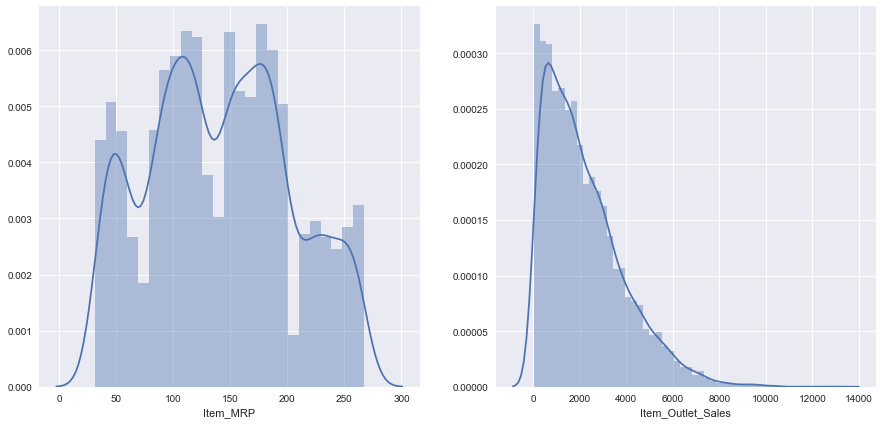

In [29]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
sns.distplot(sales['Item_MRP'])
fig.add_subplot(122)
sns.distplot(sales['Item_Outlet_Sales'])

In [31]:
corr_matrix = sales.corr()

In [32]:
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.566739
Item_Weight                  0.019046
Outlet_Establishment_Year   -0.043774
Item_Visibility             -0.128151
Name: Item_Outlet_Sales, dtype: float64

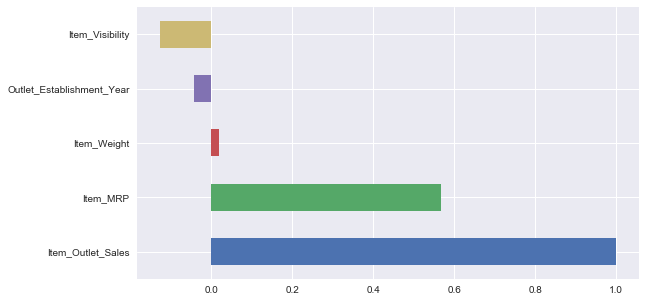

In [33]:
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False).plot.barh(figsize=(9, 5))

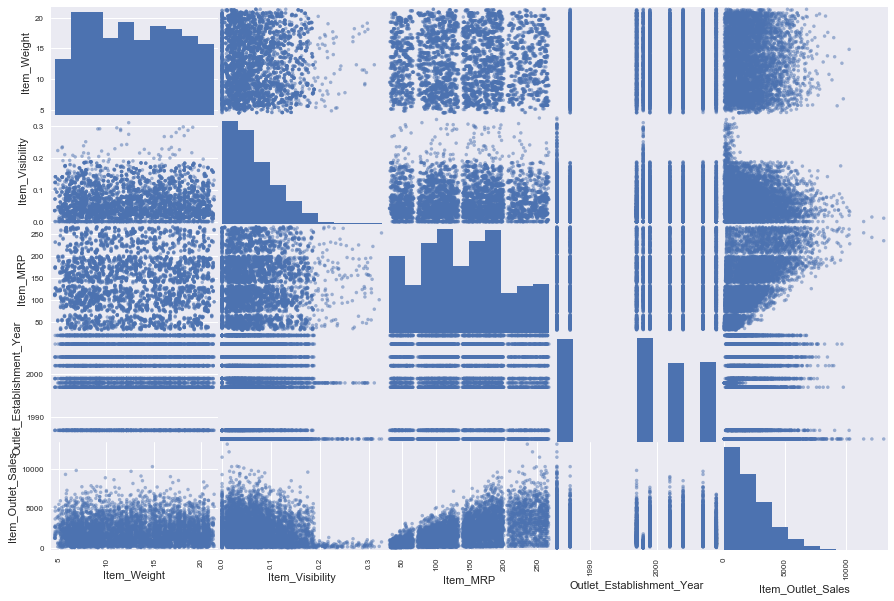

In [34]:
from pandas.plotting import scatter_matrix

scatter_matrix(sales, figsize=(15, 10))
plt.show()

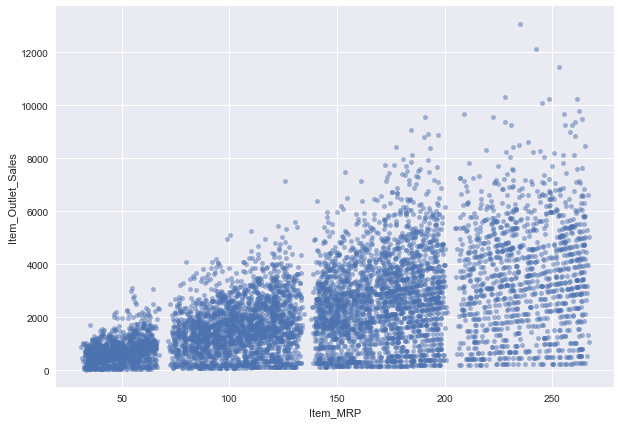

In [35]:
sales.plot(kind="scatter", x="Item_MRP", y="Item_Outlet_Sales",
             alpha=0.5, figsize=(10, 7))
plt.show()

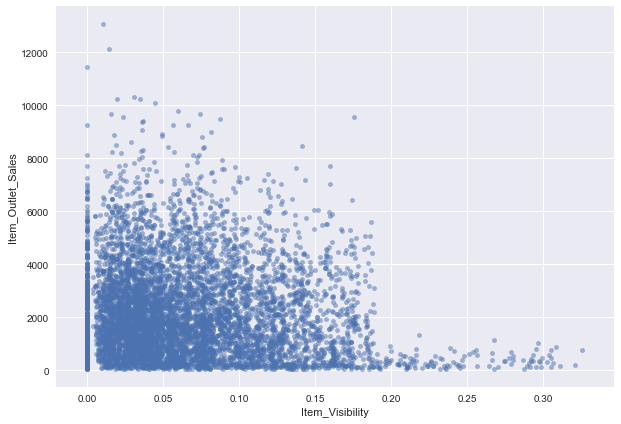

In [36]:
sales.plot(kind="scatter", x="Item_Visibility", y="Item_Outlet_Sales",
             alpha=0.5, figsize=(10, 7))

# OUTLIERS 

In [37]:
zero_vis_sales = sales[(sales["Item_Visibility"] == 0)]
zero_vis_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8404,DRH39,NaN,Low Fat,0.0,Dairy,75.9670,OUT019,1985,Small,Tier 1,Grocery Store,153.1340
1972,NCO02,11.150,Low Fat,0.0,Others,65.0142,OUT049,1999,Medium,Tier 1,Supermarket Type1,1120.5414
968,NCO17,10.000,Low Fat,0.0,Health and Hygiene,120.6440,OUT035,2004,Small,Tier 2,Supermarket Type1,1917.5040
1346,FDN12,15.600,Low Fat,0.0,Baking Goods,111.8544,OUT018,2009,Medium,Tier 3,Supermarket Type2,1454.1072
6938,FDY33,14.500,Regular,0.0,Snack Foods,159.3262,OUT035,2004,Small,Tier 2,Supermarket Type1,2864.2716
3687,DRK37,5.000,Low Fat,0.0,Soft Drinks,189.8530,OUT045,2002,NaN,Tier 2,Supermarket Type1,4933.5780
623,FDY59,8.195,Low Fat,0.0,Baking Goods,93.1462,OUT018,2009,Medium,Tier 3,Supermarket Type2,647.8234
500,NCK54,12.150,Low Fat,0.0,Household,117.8150,OUT017,2007,NaN,Tier 2,Supermarket Type1,2330.3000
7102,FDQ39,14.800,Low Fat,0.0,Meat,189.3846,OUT013,1987,High,Tier 3,Supermarket Type1,4777.1150
6093,FDE21,NaN,Low Fat,0.0,Fruits and Vegetables,115.3492,OUT027,1985,Medium,Tier 3,Supermarket Type3,3823.0236


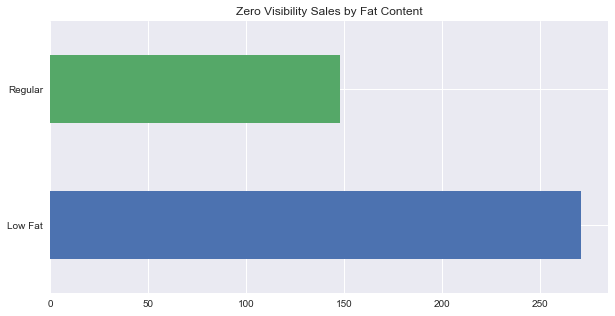

In [38]:
zero_vis_sales["Item_Fat_Content"].value_counts().plot.barh(figsize=(10, 5), title='Zero Visibility Sales by Fat Content')

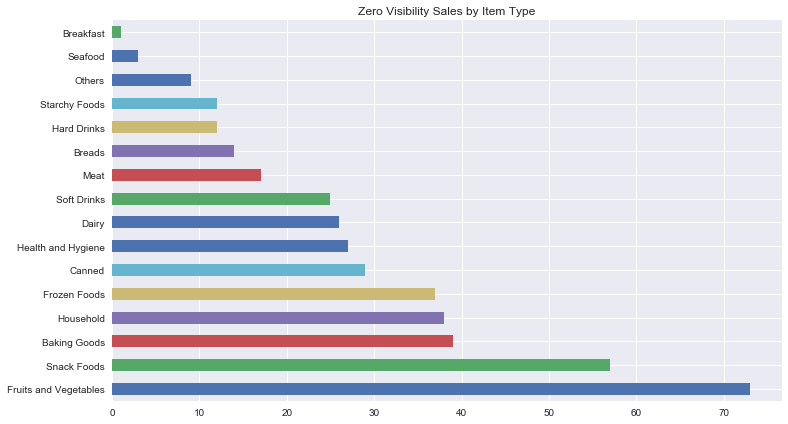

In [39]:
zero_vis_sales["Item_Type"].value_counts().plot.barh(figsize=(12, 7), title='Zero Visibility Sales by Item Type')

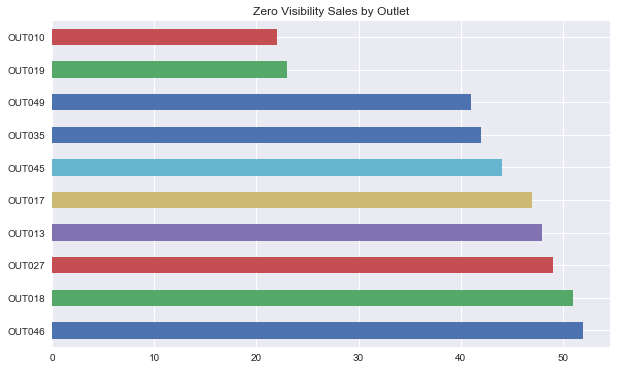

In [40]:
zero_vis_sales["Outlet_Identifier"].value_counts().plot.barh(figsize=(10, 6), title='Zero Visibility Sales by Outlet')

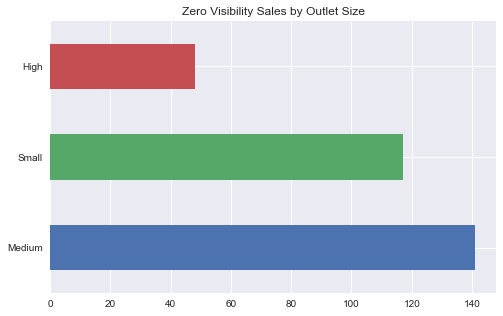

In [41]:
zero_vis_sales["Outlet_Size"].value_counts().plot.barh(figsize=(8, 5), title='Zero Visibility Sales by Outlet Size')

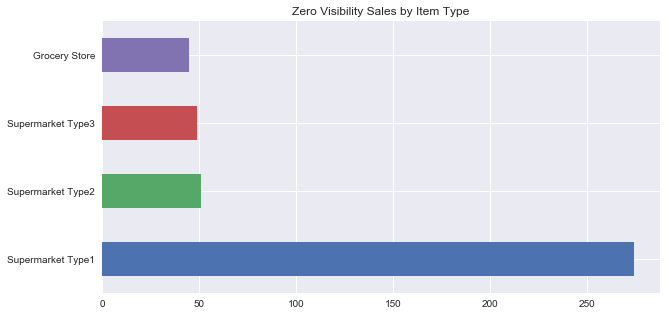

In [42]:
zero_vis_sales["Outlet_Type"].value_counts().plot.barh(figsize=(10, 5), title='Zero Visibility Sales by Item Type')

In [43]:
low_vis_high_sales = sales[(sales["Item_Visibility"] < 0.02) & (sales["Item_Outlet_Sales"] > 11000)]
low_vis_high_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1450,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
5223,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


In [44]:
high_vis_low_sales = sales[(sales["Item_Visibility"] > 0.19) & (sales["Item_Outlet_Sales"] < 2000)]
high_vis_low_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
7949,FDK25,NaN,Regular,0.274592,Breakfast,167.8474,OUT019,1985,Small,Tier 1,Grocery Store,336.8948
847,FDL56,NaN,Low Fat,0.220226,Fruits and Vegetables,85.6198,OUT019,1985,Small,Tier 1,Grocery Store,87.2198
7072,FDL32,NaN,Regular,0.214424,Fruits and Vegetables,111.6544,OUT019,1985,Small,Tier 1,Grocery Store,335.5632
6909,FDC47,15.000,Low Fat,0.198999,Snack Foods,226.5694,OUT010,1998,NaN,Tier 3,Grocery Store,913.4776
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
3767,FDN13,NaN,Low Fat,0.266234,Breakfast,98.5358,OUT019,1985,Small,Tier 1,Grocery Store,402.1432
4530,FDZ16,16.850,Regular,0.267566,Frozen Foods,194.1478,OUT010,1998,NaN,Tier 3,Grocery Store,1162.4868
7250,FDT24,12.350,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,NaN,Tier 3,Grocery Store,154.4656
4350,FDN49,17.250,Regular,0.209600,Breakfast,40.3480,OUT010,1998,NaN,Tier 3,Grocery Store,39.9480


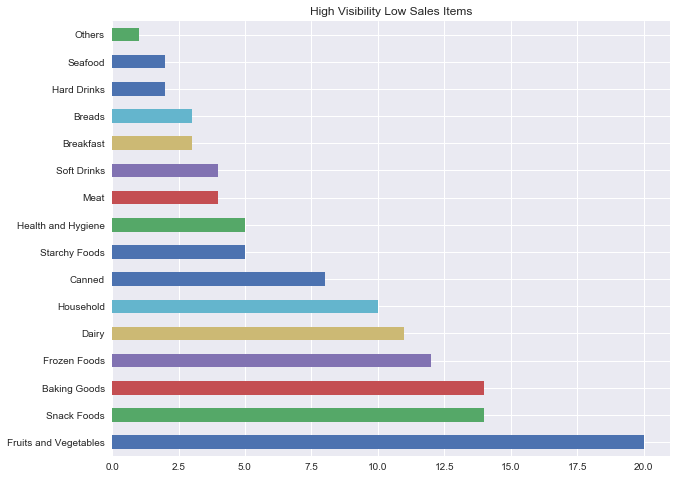

In [45]:
high_vis_low_sales["Item_Type"].value_counts().plot.barh(figsize=(10, 8), title="High Visibility Low Sales Items")

In [46]:
high_vis_low_sales["Outlet_Type"].value_counts()

Grocery Store    118
Name: Outlet_Type, dtype: int64

# SALES ANALYSIS

In [47]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
251,FDL20,17.10,Low Fat,0.128938,Fruits and Vegetables,112.3886,OUT018,2009,Medium,Tier 3,Supermarket Type2,1779.0176
5943,FDM58,16.85,Regular,0.079624,Snack Foods,111.6544,OUT013,1987,High,Tier 3,Supermarket Type1,2125.2336
4778,FDT09,15.15,Regular,0.012333,Snack Foods,130.0284,OUT017,2007,NaN,Tier 2,Supermarket Type1,3559.3668
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
4889,FDP01,20.75,Regular,0.063314,Breakfast,153.7682,OUT035,2004,Small,Tier 2,Supermarket Type1,1829.6184


### Sales by Item Type 

In [48]:
sales_by_item_type = sales.groupby(["Item_Type"])['Item_Outlet_Sales'].sum()
sales_by_item_type

Item_Type
Baking Goods             1.026592e+06
Breads                   4.246506e+05
Breakfast                1.962679e+05
Canned                   1.185942e+06
Dairy                    1.240867e+06
Frozen Foods             1.438243e+06
Fruits and Vegetables    2.251777e+06
Hard Drinks              3.651920e+05
Health and Hygiene       8.415366e+05
Household                1.629266e+06
Meat                     7.136004e+05
Others                   2.670471e+05
Seafood                  1.138525e+05
Snack Foods              2.150829e+06
Soft Drinks              7.275822e+05
Starchy Foods            2.841435e+05
Name: Item_Outlet_Sales, dtype: float64

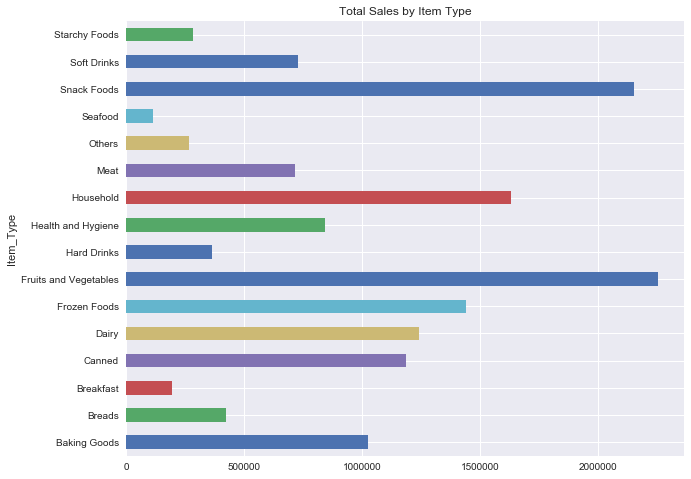

In [49]:
sales_by_item_type.plot.barh(figsize=(10,8), title="Total Sales by Item Type")

### Sales by Item Type and Outlet Type

In [50]:
sales_by_item_type_outlet_type = sales.groupby(["Item_Type", "Outlet_Type"])['Item_Outlet_Sales'].sum().unstack().fillna(0)
sales_by_item_type_outlet_type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,20476.6790,7.321803e+05,92490.2728,181445.1476
Breads,9722.0116,2.911204e+05,53636.1822,70171.9910
Breakfast,5920.9594,1.347246e+05,14917.2490,40705.0146
Canned,21366.8536,8.238496e+05,112679.9920,228045.8212
Dairy,24593.9862,8.629354e+05,134649.3946,218688.6680
Frozen Foods,27638.6896,1.004697e+06,135815.8762,270091.0912
Fruits and Vegetables,39687.6722,1.558447e+06,224291.3750,429351.1170
Hard Drinks,4762.4674,2.680877e+05,29582.1598,62759.6396
Health and Hygiene,19595.8256,5.843980e+05,82966.6696,154576.1228


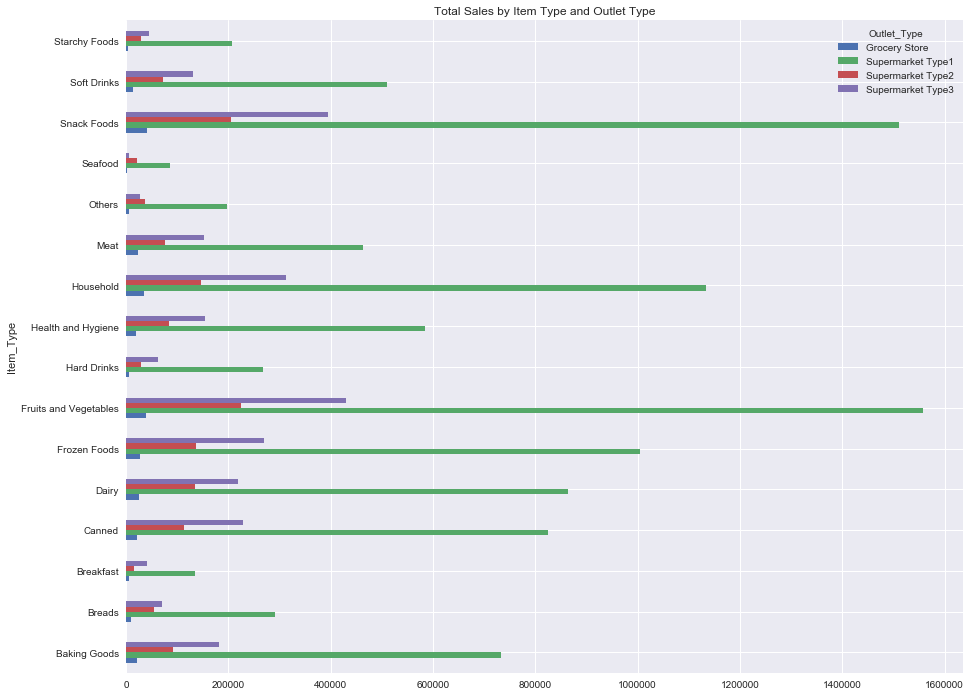

In [51]:
sales_by_item_type_outlet_type.plot.barh(figsize=(15,12), title="Total Sales by Item Type and Outlet Type")

In [52]:
listing_price_by_item_type = sales.groupby(["Item_Type"])['Item_MRP'].median()#.unstack().fillna(0)
listing_price_by_item_type

Item_Type
Baking Goods             112.4544
Breads                   128.8310
Breakfast                155.3630
Canned                   140.1496
Dairy                    150.4708
Frozen Foods             127.2678
Fruits and Vegetables    145.4444
Hard Drinks              143.8128
Health and Hygiene       129.6468
Household                154.2814
Meat                     149.8366
Others                   127.5507
Seafood                  158.4604
Snack Foods              146.9076
Soft Drinks              143.9102
Starchy Foods            172.9593
Name: Item_MRP, dtype: float64

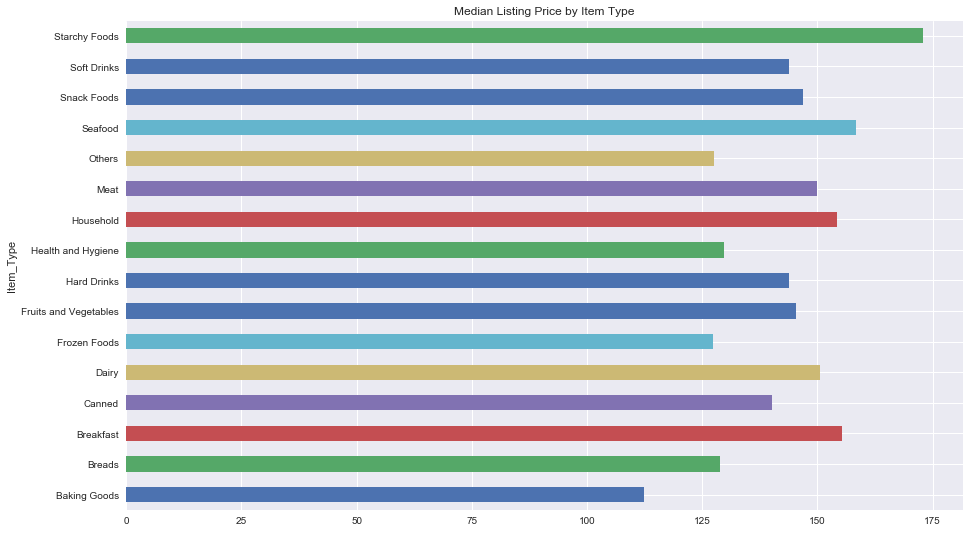

In [53]:
listing_price_by_item_type.plot.barh(figsize=(15,9), title="Median Listing Price by Item Type")

In [54]:
listing_price_by_item_type_outlet_type = sales.groupby(["Item_Type", "Outlet_Type"])['Item_MRP'].median().unstack().fillna(0)
listing_price_by_item_type_outlet_type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,121.3098,110.5570,111.8544,121.5914
Breads,130.0152,130.3310,126.0678,110.1570
Breakfast,165.3500,151.7682,131.3310,169.3474
Canned,141.8838,138.6838,123.8046,153.4682
Dairy,147.1760,150.6708,155.4485,124.3704
Frozen Foods,126.9178,127.4020,126.4520,126.9336
Fruits and Vegetables,124.2388,147.6102,131.3126,146.0760
Hard Drinks,122.6585,136.5732,174.2080,165.7000
Health and Hygiene,140.7654,131.3310,114.4492,124.1072


In [59]:
sales["mrp_per_visibility"] = sales["Item_MRP"] / sales["Item_Visibility"]
sales["mrp_per_weight"] = sales["Item_MRP"] / sales["Item_Weight"]
sales["visibility_per_weight"] = sales["Item_Visibility"] / sales["Item_Weight"]
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,mrp_per_visibility,mrp_per_weight,visibility_per_weight
251,FDL20,17.10,Low Fat,0.128938,Fruits and Vegetables,112.3886,OUT018,2009,Medium,Tier 3,Supermarket Type2,1779.0176,871.650681,6.572433,0.007540
5943,FDM58,16.85,Regular,0.079624,Snack Foods,111.6544,OUT013,1987,High,Tier 3,Supermarket Type1,2125.2336,1402.269140,6.626374,0.004725
4778,FDT09,15.15,Regular,0.012333,Snack Foods,130.0284,OUT017,2007,NaN,Tier 2,Supermarket Type1,3559.3668,10543.412872,8.582733,0.000814
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920,239.214271,3.883143,0.016233
4889,FDP01,20.75,Regular,0.063314,Breakfast,153.7682,OUT035,2004,Small,Tier 2,Supermarket Type1,1829.6184,2428.661325,7.410516,0.003051


# Handling Missing Data

In [63]:
sample_incomplete_rows = sales[sales.isnull().any(axis=1)]
sample_incomplete_rows.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4778,FDT09,15.150,Regular,0.012333,Snack Foods,130.0284,OUT017,2007,NaN,Tier 2,Supermarket Type1
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store
4664,FDE41,9.195,Regular,0.064144,Frozen Foods,85.9566,OUT045,2002,NaN,Tier 2,Supermarket Type1
4501,NCU42,9.000,Low Fat,0.019617,Household,169.6474,OUT017,2007,NaN,Tier 2,Supermarket Type1
7976,FDX35,5.035,Regular,0.080073,Breads,228.2036,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [64]:
sales["Outlet_Size"].value_counts()

Medium    2260
Small     1878
High       749
Name: Outlet_Size, dtype: int64

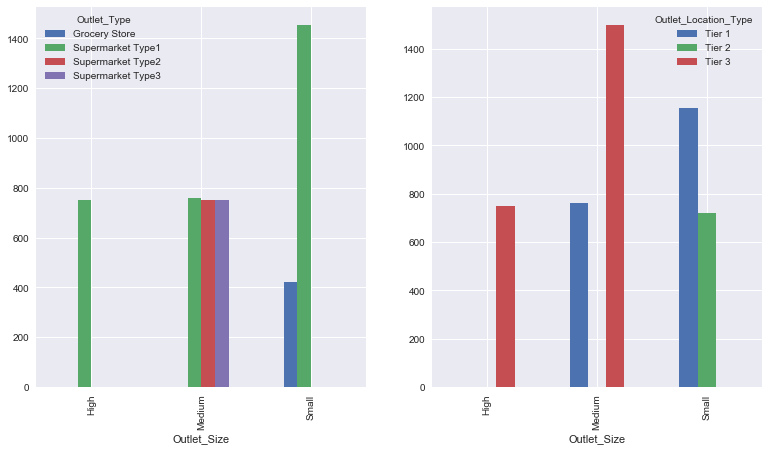

In [65]:
fig = plt.figure(figsize=(13,7))
ax1 = fig.add_subplot(121)
pd.crosstab(sales["Outlet_Size"], [sales["Outlet_Type"]]).plot.bar(ax=ax1)
ax2 = fig.add_subplot(122)
pd.crosstab(sales["Outlet_Size"], [sales["Outlet_Location_Type"]]).plot.bar(ax=ax2)

In [66]:
row_filter = (pd.isnull(sales["Outlet_Size"])) & ((sales["Outlet_Type"] == "Grocery Store") | (sales["Outlet_Location_Type"] == "Tier 2"))
sales[row_filter]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4778,FDT09,15.150,Regular,0.012333,Snack Foods,130.0284,OUT017,2007,NaN,Tier 2,Supermarket Type1
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store
4664,FDE41,9.195,Regular,0.064144,Frozen Foods,85.9566,OUT045,2002,NaN,Tier 2,Supermarket Type1
4501,NCU42,9.000,Low Fat,0.019617,Household,169.6474,OUT017,2007,NaN,Tier 2,Supermarket Type1
7976,FDX35,5.035,Regular,0.080073,Breads,228.2036,OUT045,2002,NaN,Tier 2,Supermarket Type1
2299,FDR02,16.700,Low Fat,0.022110,Dairy,110.8886,OUT045,2002,NaN,Tier 2,Supermarket Type1
5846,FDN12,15.600,Low Fat,0.081563,Baking Goods,112.7544,OUT017,2007,NaN,Tier 2,Supermarket Type1
8180,NCR05,10.100,Low Fat,0.054742,Health and Hygiene,200.2084,OUT045,2002,NaN,Tier 2,Supermarket Type1
5298,NCP05,19.600,Low Fat,0.025430,Health and Hygiene,151.7024,OUT017,2007,NaN,Tier 2,Supermarket Type1
8302,FDY20,12.500,Regular,0.082215,Fruits and Vegetables,91.4488,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [67]:
sales.loc[row_filter, 'Outlet_Size'] = "Small"

In [68]:
sales[row_filter]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4778,FDT09,15.150,Regular,0.012333,Snack Foods,130.0284,OUT017,2007,Small,Tier 2,Supermarket Type1
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Small,Tier 3,Grocery Store
4664,FDE41,9.195,Regular,0.064144,Frozen Foods,85.9566,OUT045,2002,Small,Tier 2,Supermarket Type1
4501,NCU42,9.000,Low Fat,0.019617,Household,169.6474,OUT017,2007,Small,Tier 2,Supermarket Type1
7976,FDX35,5.035,Regular,0.080073,Breads,228.2036,OUT045,2002,Small,Tier 2,Supermarket Type1
2299,FDR02,16.700,Low Fat,0.022110,Dairy,110.8886,OUT045,2002,Small,Tier 2,Supermarket Type1
5846,FDN12,15.600,Low Fat,0.081563,Baking Goods,112.7544,OUT017,2007,Small,Tier 2,Supermarket Type1
8180,NCR05,10.100,Low Fat,0.054742,Health and Hygiene,200.2084,OUT045,2002,Small,Tier 2,Supermarket Type1
5298,NCP05,19.600,Low Fat,0.025430,Health and Hygiene,151.7024,OUT017,2007,Small,Tier 2,Supermarket Type1
8302,FDY20,12.500,Regular,0.082215,Fruits and Vegetables,91.4488,OUT017,2007,Small,Tier 2,Supermarket Type1


In [69]:
sales["Outlet_Size"].value_counts()

Small     3809
Medium    2260
High       749
Name: Outlet_Size, dtype: int64

In [70]:
pd.isnull(sales["Outlet_Size"]).value_counts()

False    6818
Name: Outlet_Size, dtype: int64

In [71]:
sales_test = strat_test_set.drop("Item_Outlet_Sales", axis=1) # drop labels for testing set
sales_test_labels = strat_test_set["Item_Outlet_Sales"].copy()

In [72]:
row_filter = (pd.isnull(sales_test["Outlet_Size"])) & ((sales_test["Outlet_Type"] == "Grocery Store") | (sales_test["Outlet_Location_Type"] == "Tier 2"))
sales_test[row_filter]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1250,FDJ22,18.750,Low Fat,0.053109,Snack Foods,193.6504,OUT017,2007,NaN,Tier 2,Supermarket Type1
4987,FDR48,11.650,Low Fat,0.220111,Baking Goods,153.0024,OUT010,1998,NaN,Tier 3,Grocery Store
1151,FDK43,9.800,Low Fat,0.026993,Meat,127.3020,OUT017,2007,NaN,Tier 2,Supermarket Type1
693,FDR24,17.350,Regular,0.062979,Baking Goods,87.9830,OUT045,2002,NaN,Tier 2,Supermarket Type1
1162,FDU34,18.250,Low Fat,0.075620,Snack Foods,123.8046,OUT017,2007,NaN,Tier 2,Supermarket Type1
591,FDG14,9.000,Regular,0.050786,Canned,152.2024,OUT017,2007,NaN,Tier 2,Supermarket Type1
6422,NCM42,6.130,Low Fat,0.028482,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1
3609,FDC14,14.500,Regular,0.041482,Canned,40.0454,OUT017,2007,NaN,Tier 2,Supermarket Type1
483,FDC02,21.350,Low Fat,0.115195,Canned,258.3278,OUT010,1998,NaN,Tier 3,Grocery Store
4016,FDO40,17.100,Low Fat,0.054613,Frozen Foods,150.2392,OUT010,1998,NaN,Tier 3,Grocery Store


In [73]:
sales_test.loc[row_filter, 'Outlet_Size'] = "Small"

In [74]:
sales_test[row_filter]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1250,FDJ22,18.750,Low Fat,0.053109,Snack Foods,193.6504,OUT017,2007,Small,Tier 2,Supermarket Type1
4987,FDR48,11.650,Low Fat,0.220111,Baking Goods,153.0024,OUT010,1998,Small,Tier 3,Grocery Store
1151,FDK43,9.800,Low Fat,0.026993,Meat,127.3020,OUT017,2007,Small,Tier 2,Supermarket Type1
693,FDR24,17.350,Regular,0.062979,Baking Goods,87.9830,OUT045,2002,Small,Tier 2,Supermarket Type1
1162,FDU34,18.250,Low Fat,0.075620,Snack Foods,123.8046,OUT017,2007,Small,Tier 2,Supermarket Type1
591,FDG14,9.000,Regular,0.050786,Canned,152.2024,OUT017,2007,Small,Tier 2,Supermarket Type1
6422,NCM42,6.130,Low Fat,0.028482,Household,110.4912,OUT017,2007,Small,Tier 2,Supermarket Type1
3609,FDC14,14.500,Regular,0.041482,Canned,40.0454,OUT017,2007,Small,Tier 2,Supermarket Type1
483,FDC02,21.350,Low Fat,0.115195,Canned,258.3278,OUT010,1998,Small,Tier 3,Grocery Store
4016,FDO40,17.100,Low Fat,0.054613,Frozen Foods,150.2392,OUT010,1998,Small,Tier 3,Grocery Store


In [75]:
sales_test["Outlet_Size"].value_counts()

Small     989
Medium    533
High      183
Name: Outlet_Size, dtype: int64

In [76]:
pd.isnull(sales_test["Outlet_Size"]).value_counts()

False    1705
Name: Outlet_Size, dtype: int64

In [77]:
row_filter = (pd.isnull(test["Outlet_Size"])) & ((test["Outlet_Type"] == "Grocery Store") | (test["Outlet_Location_Type"] == "Tier 2"))
test[row_filter]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
10,FDT44,16.600,Low Fat,0.103569,Fruits and Vegetables,118.3466,OUT017,2007,NaN,Tier 2,Supermarket Type1
11,FDQ56,6.590,Low Fat,0.105811,Fruits and Vegetables,85.3908,OUT045,2002,NaN,Tier 2,Supermarket Type1
16,FDI57,19.850,Low Fat,0.054135,Seafood,198.7768,OUT045,2002,NaN,Tier 2,Supermarket Type1
19,FDA46,13.600,Low Fat,0.196898,Snack Foods,193.7136,OUT010,1998,NaN,Tier 3,Grocery Store
25,FDX22,6.785,Regular,0.038455,Snack Foods,209.4928,OUT010,1998,NaN,Tier 3,Grocery Store


In [78]:
test.loc[row_filter, 'Outlet_Size'] = "Small"

In [79]:
test["Outlet_Size"].value_counts()

Small     3198
Medium    1862
High       621
Name: Outlet_Size, dtype: int64

In [80]:
pd.isnull(test["Outlet_Size"]).value_counts()

False    5681
Name: Outlet_Size, dtype: int64

In [81]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [82]:
sales_num = sales.select_dtypes(include=[np.number])
sales_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
251,17.10,0.128938,112.3886,2009
5943,16.85,0.079624,111.6544,1987
4778,15.15,0.012333,130.0284,2007
8432,14.00,0.227261,54.3640,1998
4889,20.75,0.063314,153.7682,2004


In [83]:
imputer.fit(sales_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [84]:
imputer.statistics_

array([1.26000000e+01, 5.35904695e-02, 1.42964100e+02, 1.99900000e+03])

In [85]:
sales_num.median().values

array([1.26000000e+01, 5.35904695e-02, 1.42964100e+02, 1.99900000e+03])

In [86]:
X = imputer.transform(sales_num)

In [87]:
sales_tr = pd.DataFrame(X, columns=sales_num.columns,
                          index = list(sales.index.values))

In [88]:
sales_tr.loc[sample_incomplete_rows.index.values]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
4778,15.150,0.012333,130.0284,2007.0
8432,14.000,0.227261,54.3640,1998.0
4664,9.195,0.064144,85.9566,2002.0
4501,9.000,0.019617,169.6474,2007.0
7976,5.035,0.080073,228.2036,2002.0
2299,16.700,0.022110,110.8886,2002.0
3618,12.600,0.134057,45.3402,1985.0
5846,15.600,0.081563,112.7544,2007.0
6511,12.600,0.053032,149.1734,1985.0
8180,10.100,0.054742,200.2084,2002.0


In [89]:
sales_tr = pd.DataFrame(X, columns=sales_num.columns)
sales_tr.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,17.10,0.128938,112.3886,2009.0
1,16.85,0.079624,111.6544,1987.0
2,15.15,0.012333,130.0284,2007.0
3,14.00,0.227261,54.3640,1998.0
4,20.75,0.063314,153.7682,2004.0


In [90]:
sales_cat = sales.select_dtypes(include=[np.object])
sales_cat = sales_cat.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)
sales_ids = strat_train_set[["Item_Identifier", "Outlet_Identifier"]].copy()
sales_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
251,Low Fat,Fruits and Vegetables,Medium,Tier 3,Supermarket Type2
5943,Regular,Snack Foods,High,Tier 3,Supermarket Type1
4778,Regular,Snack Foods,Small,Tier 2,Supermarket Type1
8432,Regular,Frozen Foods,Small,Tier 3,Grocery Store
4889,Regular,Breakfast,Small,Tier 2,Supermarket Type1


In [91]:
sales_ids.head()

,Item_Identifier,Outlet_Identifier
251,FDL20,OUT018
5943,FDM58,OUT013
4778,FDT09,OUT017
8432,FDI16,OUT010
4889,FDP01,OUT035


In [92]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
sales_cat_1hot = cat_encoder.fit_transform(sales_cat)
sales_cat_1hot

ValueError: could not convert string to float: 'Supermarket Type1'

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
mrp_ix, visibility_ix, weight_ix = 5, 3, 1

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        # Using np.divide to ensure divide by 0 errors are handled: if x/0, result = 0
        mrp_per_visibility =  np.divide(X[:, mrp_ix], X[:, visibility_ix], out=np.zeros_like(X[:, mrp_ix]), where=X[:, visibility_ix]!=0)  #X[:, mrp_ix] / X[:, visibility_ix]
        mrp_per_weight = np.divide(X[:, mrp_ix], X[:, weight_ix], out=np.zeros_like(X[:, mrp_ix]), where=X[:, weight_ix]!=0) #X[:, mrp_ix] / X[:, weight_ix]
        visibility_per_weight = np.divide(X[:, visibility_ix], X[:, weight_ix], out=np.zeros_like(X[:, visibility_ix]), where=X[:, weight_ix]!=0) #X[:, visibility_ix] / X[:, weight_ix]
        
        return np.c_[X, mrp_per_visibility, mrp_per_weight,
                         visibility_per_weight]
        
attr_adder = CombinedAttributesAdder()
sales_extra_attribs = attr_adder.transform(sales.values)

In [99]:
sales_extra_attribs = pd.DataFrame(
    sales_extra_attribs,
    columns=list(sales.columns)+["MRP per Visibility", "MRP per Weight", "Visibility per Weight"])
sales_extra_attribs.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,MRP per Visibility,MRP per Weight,Visibility per Weight
0,FDL20,17.1,Low Fat,0.128938,Fruits and Vegetables,112.389,OUT018,2009,Medium,Tier 3,Supermarket Type2,871.651,6.57243,0.00754021
1,FDM58,16.85,Regular,0.0796241,Snack Foods,111.654,OUT013,1987,High,Tier 3,Supermarket Type1,1402.27,6.62637,0.00472547
2,FDT09,15.15,Regular,0.0123327,Snack Foods,130.028,OUT017,2007,Small,Tier 2,Supermarket Type1,10543.4,8.58273,0.000814037
3,FDI16,14,Regular,0.227261,Frozen Foods,54.364,OUT010,1998,Small,Tier 3,Grocery Store,239.214,3.88314,0.0162329
4,FDP01,20.75,Regular,0.063314,Breakfast,153.768,OUT035,2004,Small,Tier 2,Supermarket Type1,2428.66,7.41052,0.00305128


In [100]:
sales_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
251,17.10,0.128938,112.3886,2009
5943,16.85,0.079624,111.6544,1987
4778,15.15,0.012333,130.0284,2007
8432,14.00,0.227261,54.3640,1998
4889,20.75,0.063314,153.7682,2004


In [101]:
mrp_ix, visibility_ix, weight_ix = 2, 1, 0

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        # Using np.divide to ensure divide by 0 errors are handled: if x/0, result = 0
        mrp_per_visibility =  np.divide(X[:, mrp_ix], X[:, visibility_ix], out=np.zeros_like(X[:, mrp_ix]), where=X[:, visibility_ix]!=0)  #X[:, mrp_ix] / X[:, visibility_ix]
        mrp_per_weight = np.divide(X[:, mrp_ix], X[:, weight_ix], out=np.zeros_like(X[:, mrp_ix]), where=X[:, weight_ix]!=0) #X[:, mrp_ix] / X[:, weight_ix]
        visibility_per_weight = np.divide(X[:, visibility_ix], X[:, weight_ix], out=np.zeros_like(X[:, visibility_ix]), where=X[:, weight_ix]!=0) #X[:, visibility_ix] / X[:, weight_ix]
        
        return np.c_[X, mrp_per_visibility, mrp_per_weight,
                         visibility_per_weight]

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

sales_num_tr = num_pipeline.fit_transform(sales_num)

In [103]:
sales_num_tr

array([[ 1.01806571e+00,  1.24020823e+00, -4.59328395e-01, ...,
        -5.99060802e-01, -7.75800743e-01,  3.23538135e-01],
       [ 9.58813336e-01,  2.75109747e-01, -4.71117058e-01, ...,
        -4.77065138e-01, -7.68716647e-01, -2.07192684e-01],
       [ 5.55897161e-01, -1.04182679e+00, -1.76095418e-01, ...,
         1.62459544e+00, -5.11787817e-01, -9.44706126e-01],
       ...,
       [-1.07519863e-03,  1.69894410e+00, -5.26682089e-01, ...,
        -6.36217723e-01, -5.28872821e-01,  1.14644044e+00],
       [ 7.00276558e-02,  2.01951424e-01,  3.87284480e-01, ...,
        -2.99211212e-01,  1.63597805e-02, -5.93946749e-03],
       [ 1.27877618e+00,  4.76250717e-01,  9.07437142e-01, ...,
        -2.94354985e-01, -2.13731478e-01, -1.66805877e-01]])

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [105]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
251,FDL20,17.10,Low Fat,0.128938,Fruits and Vegetables,112.3886,OUT018,2009,Medium,Tier 3,Supermarket Type2
5943,FDM58,16.85,Regular,0.079624,Snack Foods,111.6544,OUT013,1987,High,Tier 3,Supermarket Type1
4778,FDT09,15.15,Regular,0.012333,Snack Foods,130.0284,OUT017,2007,Small,Tier 2,Supermarket Type1
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Small,Tier 3,Grocery Store
4889,FDP01,20.75,Regular,0.063314,Breakfast,153.7682,OUT035,2004,Small,Tier 2,Supermarket Type1


In [106]:
num_attribs = list(sales_num)
cat_attribs = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs))
    ])

In [107]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        
    ])

In [108]:
sales_prepared = full_pipeline.fit_transform(sales)
sales_prepared

array([[ 1.01806571e+00,  1.24020823e+00, -4.59328395e-01, ...,
        -5.99060802e-01, -7.75800743e-01,  3.23538135e-01],
       [ 9.58813336e-01,  2.75109747e-01, -4.71117058e-01, ...,
        -4.77065138e-01, -7.68716647e-01, -2.07192684e-01],
       [ 5.55897161e-01, -1.04182679e+00, -1.76095418e-01, ...,
         1.62459544e+00, -5.11787817e-01, -9.44706126e-01],
       ...,
       [-1.07519863e-03,  1.69894410e+00, -5.26682089e-01, ...,
        -6.36217723e-01, -5.28872821e-01,  1.14644044e+00],
       [ 7.00276558e-02,  2.01951424e-01,  3.87284480e-01, ...,
        -2.99211212e-01,  1.63597805e-02, -5.93946749e-03],
       [ 1.27877618e+00,  4.76250717e-01,  9.07437142e-01, ...,
        -2.94354985e-01, -2.13731478e-01, -1.66805877e-01]])

In [109]:
sales_prepared.shape

(6818, 7)

# Train Models

## Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(sales_prepared, sales_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
some_data = sales.iloc[:5]
some_labels = sales_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [1273.57323767 1753.19002181 2185.44817725   74.06096056 2284.09029726]


In [112]:
print("Labels:", list(some_labels))

Labels: [1779.0176, 2125.2336, 3559.3668, 159.792, 1829.6184]


In [113]:
from sklearn.metrics import mean_squared_error

sales_predictions = lin_reg.predict(sales_prepared)
lin_mse = mean_squared_error(sales_labels, sales_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1382.0654385899052

In [114]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(sales_labels, sales_predictions)
lin_mae

1023.3980984462017

## Decision Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(sales_prepared, sales_labels)
sales_predictions = tree_reg.predict(sales_prepared)
tree_mse = mean_squared_error(sales_labels, sales_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Random Forest

In [116]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(sales_prepared, sales_labels)
sales_predictions = forest_reg.predict(sales_prepared)
forest_mse = mean_squared_error(sales_labels, sales_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

570.9896461151714

## SVM

In [117]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(sales_prepared, sales_labels)
sales_predictions = svm_reg.predict(sales_prepared)
svm_mse = mean_squared_error(sales_labels, sales_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

1410.1045863369895

In [118]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [119]:
from sklearn.cross_validation import cross_val_score
lin_scores = cross_val_score(lin_reg, sales_prepared, sales_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1339.70970785 1338.25236526 1446.12872976 1349.84344535 1311.82681616
 1372.18106422 1384.19070235 1419.97103863 1461.71711052 1400.89910112]
Mean: 1382.4720081225491
Standard deviation: 46.93177424709004


C:\Users\My Pc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [120]:
pd.Series(lin_rmse_scores).describe()

count      10.000000
mean     1382.472008
std        49.470434
min      1311.826816
25%      1342.243142
50%      1378.185883
75%      1415.203054
max      1461.717111
dtype: float64

In [121]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, sales_prepared, sales_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [1798.838719   1856.04841439 1777.46344359 1738.10792788 1933.75764391
 1908.46100873 1818.37703228 1865.68724102 1959.07271553 1837.60939408]
Mean: 1849.3423540396725
Standard deviation: 66.45347341508815


In [138]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, sales_prepared, sales_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
print("RMSE",forest_rmse_scores)

Scores: [1318.01131095 1352.20275749 1446.94837385 1311.11561267 1361.6158346
 1387.44038067 1363.15285104 1437.43193151 1512.95202901 1408.53916728]
Mean: 1389.9410249074742
Standard deviation: 59.43105598049384
RMSE [1318.01131095 1352.20275749 1446.94837385 1311.11561267 1361.6158346
 1387.44038067 1363.15285104 1437.43193151 1512.95202901 1408.53916728]


In [123]:
sales_prepared.shape


(6818, 7)

In [124]:
sales_labels.shape

(6818,)

In [125]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
251,FDL20,17.10,Low Fat,0.128938,Fruits and Vegetables,112.3886,OUT018,2009,Medium,Tier 3,Supermarket Type2
5943,FDM58,16.85,Regular,0.079624,Snack Foods,111.6544,OUT013,1987,High,Tier 3,Supermarket Type1
4778,FDT09,15.15,Regular,0.012333,Snack Foods,130.0284,OUT017,2007,Small,Tier 2,Supermarket Type1
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Small,Tier 3,Grocery Store
4889,FDP01,20.75,Regular,0.063314,Breakfast,153.7682,OUT035,2004,Small,Tier 2,Supermarket Type1


In [126]:
sales.shape

(6818, 11)

In [127]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sales_prepared,sales_labels,test_size=0.25,random_state=4)

In [128]:
print(x_train.shape)

(5113, 7)


In [129]:
print(y_train.shape)

(5113,)


## Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
p=linreg.fit(sales_prepared,sales_labels)
y_pred=linreg.predict(sales_prepared)
y_pred.shape
y_pred

array([1273.57323767, 1753.19002181, 2185.44817725, ..., 1286.35902201,
       2397.66727501, 2964.43176131])

In [133]:
sales_labels.head()

251     1779.0176
5943    2125.2336
4778    3559.3668
8432     159.7920
4889    1829.6184
Name: Item_Outlet_Sales, dtype: float64

In [135]:
from sklearn import metrics
print("RMSE",np.sqrt(metrics.mean_squared_error(sales_labels,y_pred)))

RMSE 1382.0654385899052


## KNeighborsRegressor

In [137]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=6)
knr.fit(sales_prepared,sales_labels)
y_pred_knr=knr.predict(sales_prepared)
print("RMSE KNR",np.sqrt(metrics.mean_squared_error(sales_labels,y_pred_knr)))

RMSE KNR 1214.1897482295415


# Executing Best Model on Validation Set

In [142]:
#Best Model is KNeighbors Regressor
X_test = sales_test.copy()
y_test = sales_test_labels.copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = knr.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [143]:
final_rmse

1481.5575921234104

In [144]:
len(final_predictions)

1705

# Running Pipeline on Test Set and Creating Export 

In [148]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
IDcol.append(target)



#X_test = test.drop("Item_Identifier", axis=1)
#X_test = X_test.drop("Outlet_Identifier", axis=1)
X_test = test.copy()

In [149]:
X_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [150]:
X_test_prepared = full_pipeline.transform(X_test)
test[target] = knr.predict(X_test_prepared)

In [151]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,2271.043800
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1449.668533
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,1403.284467
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,2753.970733
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,2237.642833


In [152]:
test.shape

(5681, 12)